In [1]:
import time
import random
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Rastgele tam sayılardan oluşan liste oluşturma fonksiyonu
def generate_random_list(length):
    random_list = [random.randint(1, 100) for _ in range(length)]
    return random_list

In [3]:
# Farklı uzunluklarda rastgele tam sayılardan oluşan listeler oluşturma
list_10 = generate_random_list(10)
list_20 = generate_random_list(20)
list_50 = generate_random_list(50)
list_100 = generate_random_list(100)
list_1000 = generate_random_list(1000)
list_10000 = generate_random_list(10000)
list_100000 = generate_random_list(100000)

In [4]:
# Zaman ölçüm fonksiyonu
def measure_time(algorithm, input_data):
    start_time = time.time()
    algorithm(input_data)
    end_time = time.time()
    elapsed_time = end_time - start_time
    return elapsed_time

In [5]:
# Sıralama algoritmaları
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[0]
        less_than_pivot = [x for x in arr[1:] if x <= pivot]
        greater_than_pivot = [x for x in arr[1:] if x > pivot]
        return quick_sort(less_than_pivot) + [pivot] + quick_sort(greater_than_pivot)

def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_index = i
        for j in range(i+1, n):
            if arr[j] < arr[min_index]:
                min_index = j
        arr[i], arr[min_index] = arr[min_index], arr[i]

def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

In [6]:
# Deney listeleri oluşturma
experiment_sizes = [10, 20, 50, 100, 1000, 10000, 100000]
experiment_results = []

for size in experiment_sizes:
    input_list = generate_random_list(size)
    quick_time = measure_time(quick_sort, input_list.copy())
    bubble_time = measure_time(bubble_sort, input_list.copy())
    selection_time = measure_time(selection_sort, input_list.copy())
    experiment_results.append((size, quick_time, bubble_time, selection_time))


# DataFrame oluşturma
df = pd.DataFrame(experiment_results, columns=['Size', 'Quick Sort', 'Bubble Sort', 'Selection Sort'])

# 'Size' sütununu index olarak ayarlama
df.set_index('Size', inplace=True)

# DataFrame'i yazdırma
df

,Quick Sort,Bubble Sort,Selection Sort
Size,,,
10,0.000008,0.000006,0.000004
20,0.000010,0.000009,0.000006
50,0.000027,0.000055,0.000023
100,0.000053,0.000178,0.000079
1000,0.000752,0.016805,0.006995
10000,0.028015,1.685068,0.670395
100000,2.340023,176.744210,67.003861


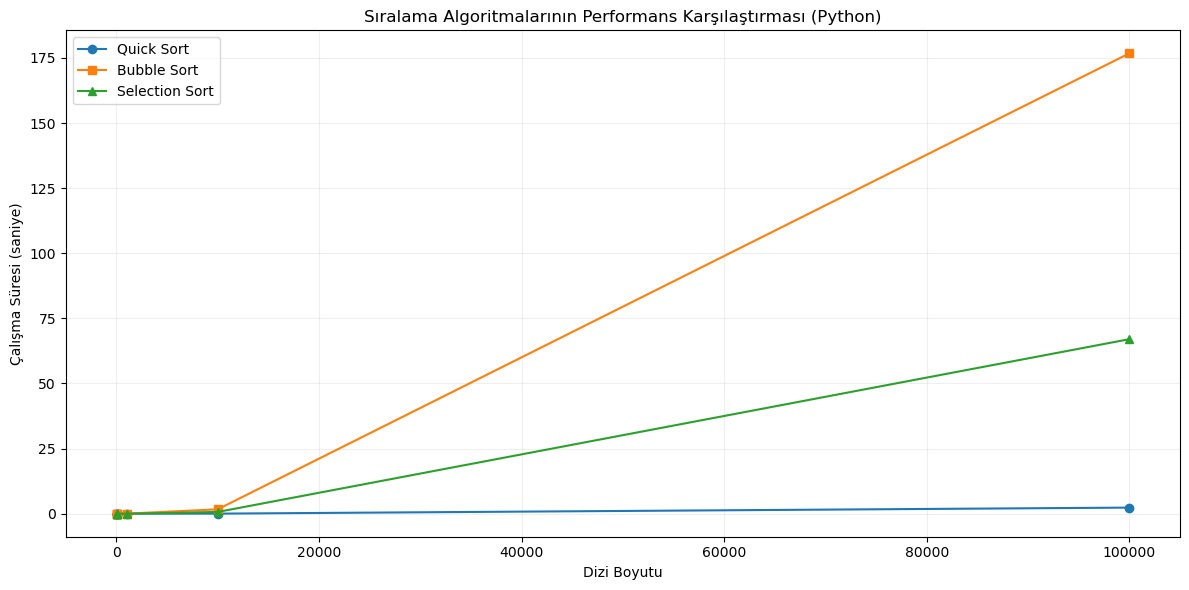

In [13]:
# Grafiği oluşturuyoruz
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Quick Sort'], label='Quick Sort', marker='o')
plt.plot(df.index, df['Bubble Sort'], label='Bubble Sort', marker='s')
plt.plot(df.index, df['Selection Sort'], label='Selection Sort', marker='^')

#plt.xscale('log')  # x eksenini logaritmik ölçeğe ayarlıyoruz
#plt.yscale('log')  # y eksenini logaritmik ölçeğe ayarlıyoruz

plt.xlabel('Dizi Boyutu')
plt.ylabel('Çalışma Süresi (saniye)')
plt.title('Sıralama Algoritmalarının Performans Karşılaştırması (Python)')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.2)

plt.tight_layout()
plt.show()

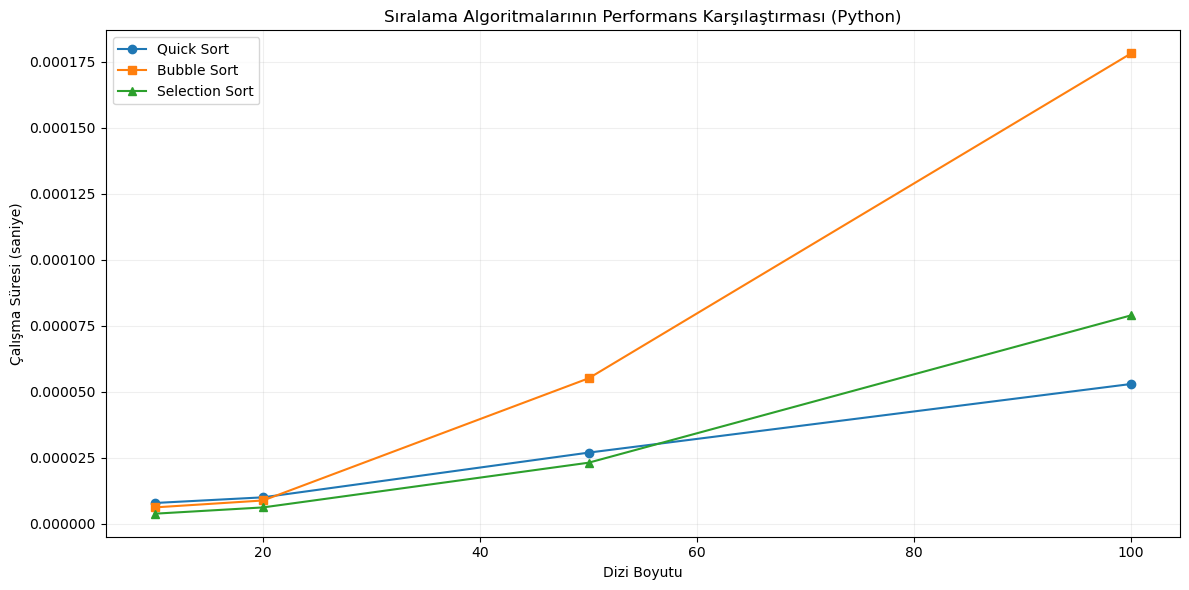

In [14]:
df2= df[0:4]

# Grafiği oluşturuyoruz
plt.figure(figsize=(12, 6))
plt.plot(df2.index, df2['Quick Sort'], label='Quick Sort', marker='o')
plt.plot(df2.index, df2['Bubble Sort'], label='Bubble Sort', marker='s')
plt.plot(df2.index, df2['Selection Sort'], label='Selection Sort', marker='^')
#plt.xscale('log')  # x eksenini logaritmik ölçeğe ayarlıyoruz
#plt.yscale('log')  # y eksenini logaritmik ölçeğe ayarlıyoruz

plt.xlabel('Dizi Boyutu')
plt.ylabel('Çalışma Süresi (saniye)')
plt.title('Sıralama Algoritmalarının Performans Karşılaştırması (Python)')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.2)

plt.tight_layout()
plt.show()